In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm

In [2]:
data = pd.read_csv('tips (data for regression problem).csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
data["sex"] = data["sex"].map({"Female" : 0, "Male" : 1})
data["smoker"] = data["smoker"].map({"Yes" : 1, "No" : 0})
data["day"] = data["day"].map({"Thur" : 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch" : 0, "Dinner" : 1})

In [12]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [14]:
x = np.array(data[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(data["tip"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=50)

In [18]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),("svr",SVR())
      ,("KNN",KNeighborsRegressor())]
for name, model in models:
    model.fit(xtrain , ytrain)
    ypred=model.predict(xtest)
    r2=r2_score(ytest, ypred)
    print("for ",name, "r2 : ",r2)

for  Linear Regression r2 :  0.35292853545545133
for  Ridge Regression r2 :  0.35354762980411203
for  Lasso Regression r2 :  0.3758042443462897
for  Decision Tree r2 :  -0.11642316253766638
for  Random Forest r2 :  0.24797821187441194
for  svr r2 :  0.3925183708709319
for  KNN r2 :  0.21473718028526256


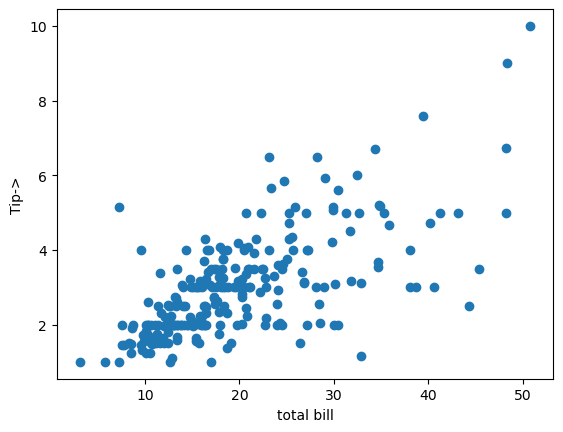

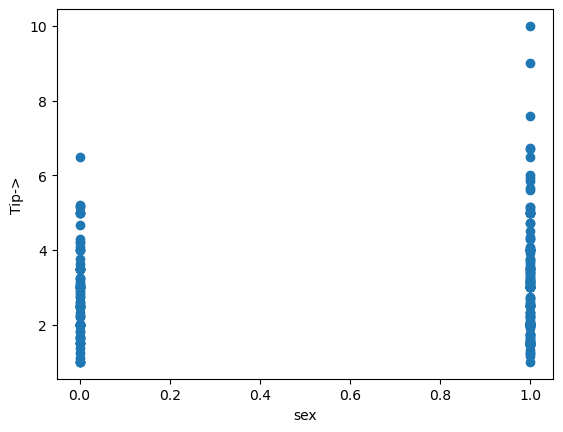

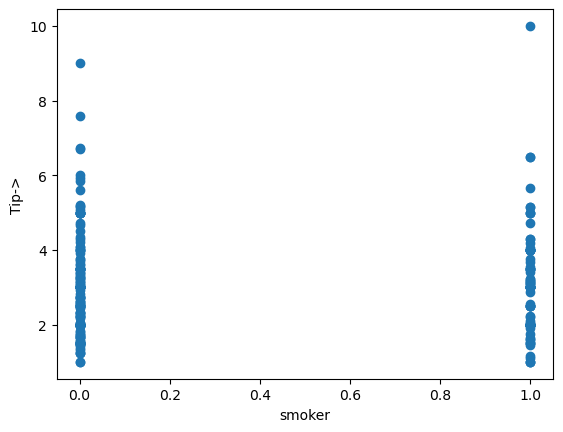

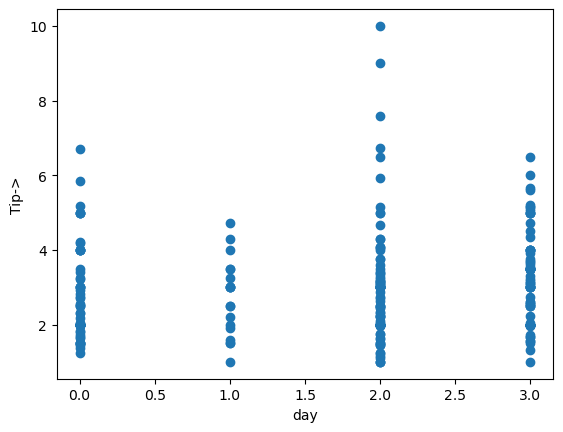

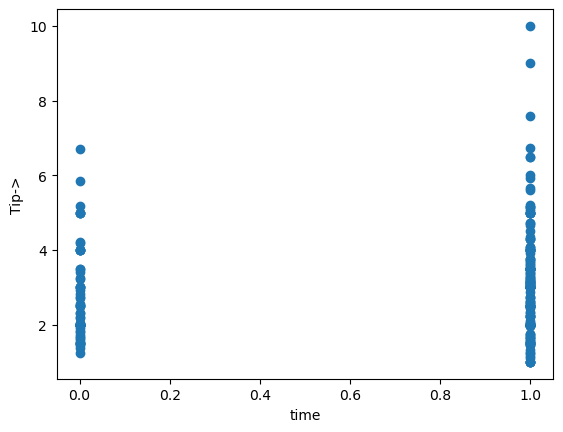

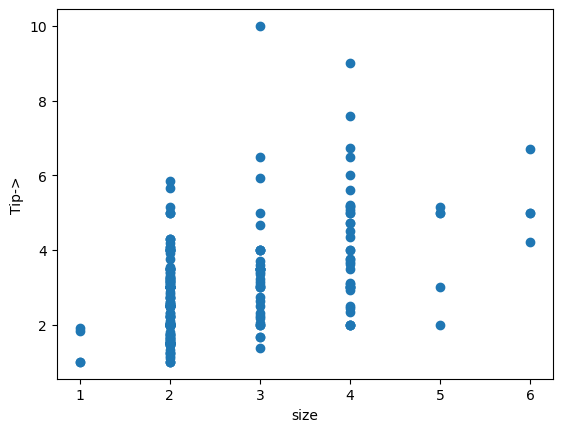

In [30]:
feature = [("total bill",data['total_bill']),("sex", data['sex']),("smoker", data['smoker']),("day", data['day']),
              ("time", data['time']),("size", data['size'])]
for a,b in feature:
    plt.scatter(b, data['tip'])
    plt.xlabel(a)
    plt.ylabel('Tip->')
    plt.show()

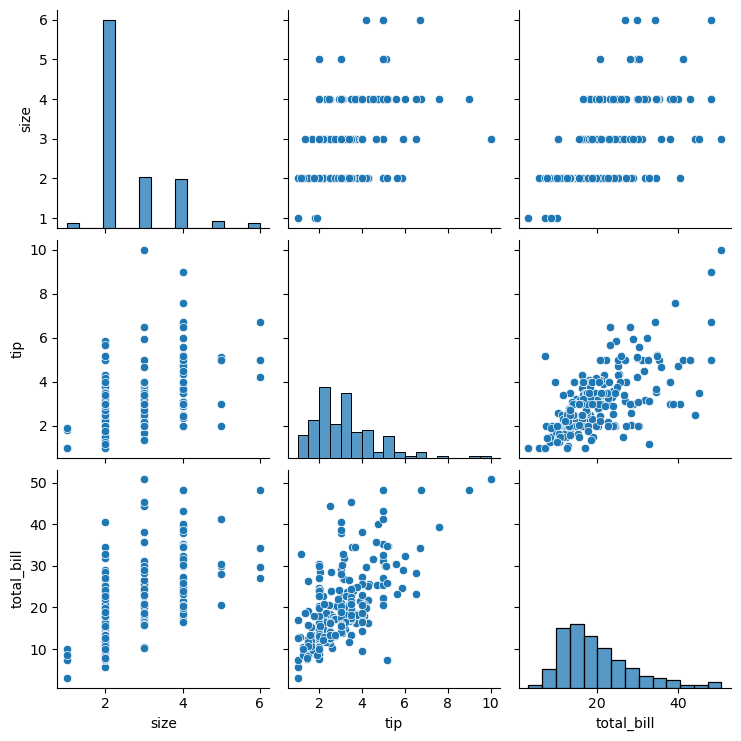

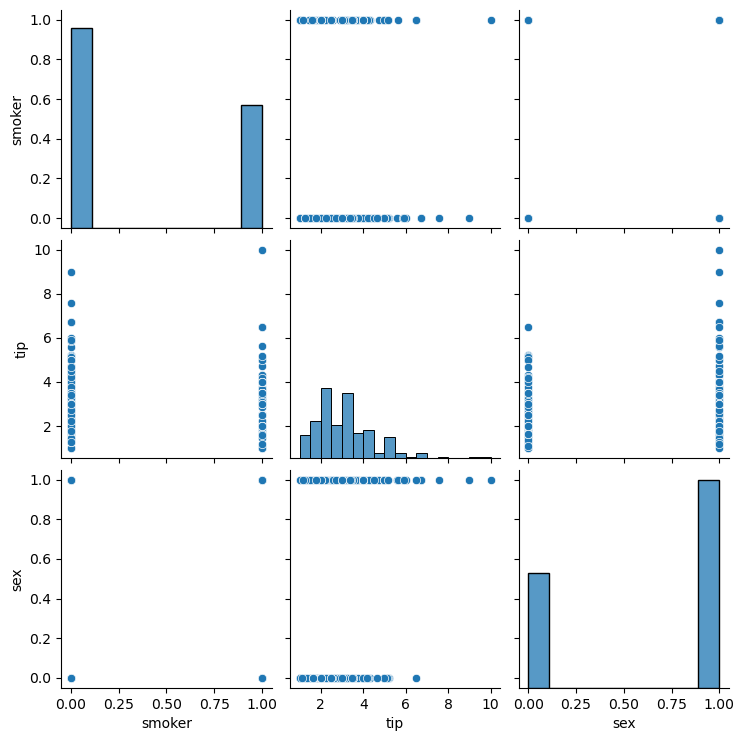

In [38]:
sns.pairplot(data[['size', 'tip', 'total_bill']])
plt.show()
sns.pairplot(data[['smoker', 'tip', 'sex']])
plt.show()

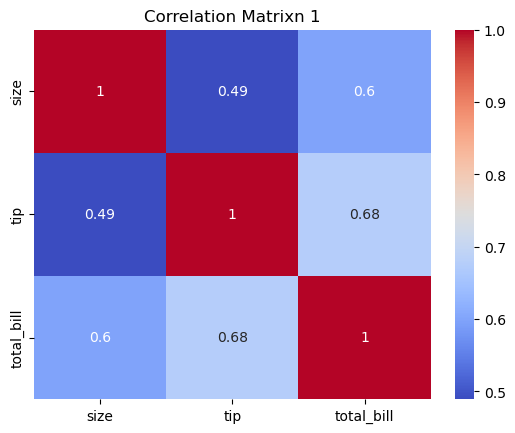

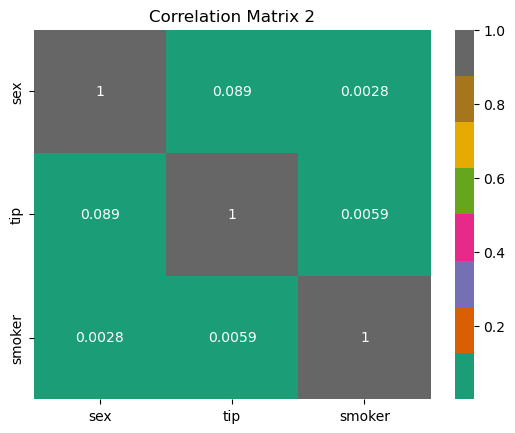

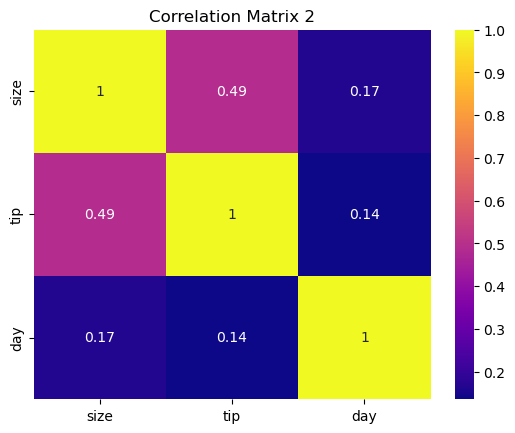

In [48]:
corr_matrix = data[['size', 'tip', 'total_bill']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrixn 1')
plt.show()
corr_matrix = data[['sex', 'tip', 'smoker']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Dark2')
plt.title('Correlation Matrix 2')
plt.show()
corr_matrix = data[['size', 'tip', 'day']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix 2')
plt.show()

In [58]:
features = [data['total_bill'], data['sex'],data['smoker'],data['day'], data['time'],data['size']]
for p in features:
    X = sm.add_constant(data['total_bill'])
    Y = p
    model = sm.OLS(Y, X).fit()
    rainbow_stats, rainbow_p_value = linear_rainbow(model)
    print(f'rainbow test statistic ": {rainbow_stats}, p-value: {rainbow_p_value}')
    

rainbow test statistic ": 2.413767715036403, p-value: 9.897194511394457e-07
rainbow test statistic ": 0.9596359860385912, p-value: 0.5896472891352866
rainbow test statistic ": 1.0967661477556323, p-value: 0.30632609082077683
rainbow test statistic ": 0.7217406121305135, p-value: 0.9630389085869561
rainbow test statistic ": 0.6858476996611753, p-value: 0.9805475303218094
rainbow test statistic ": 0.7869159695051342, p-value: 0.9056759819539304


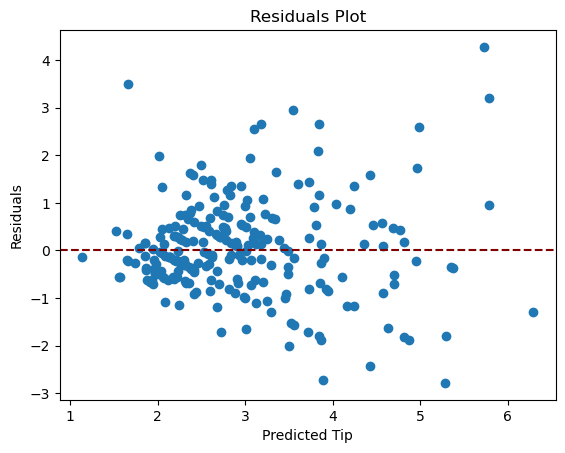

In [76]:
sol = LinearRegression()
sol.fit(xtrain,ytrain)
predicted = sol.predict(x)
residuals = y - predicted

plt.scatter(predicted, residuals)
plt.axhline(0, color='maroon', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [ ]:
sol1= Ridge()
sol1.fit(x,y)
predicted = newM.predict(x)
residuals = y - predicted

plt.scatter(predicted, residuals)
plt.axhline(0, color='YELLOW', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()